# Formative Assessment # 7

Statistical Theory

 Provide an R or Python (with markdown) file for the independent samples t-test for Invisibility Cloak data set. 
The file should have all the codes/and or explanations from Assumption 1 to 5 and computation.

## Invisibility Cloak: Independent samples t-test

This data set, "Invisibility Cloak", provides the number of mischievous acts committed by two groups of people, those with and those without an invisibility cloak.

Put the necessary library to be used

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind
import scipy.stats as stats
from scipy.stats import ttest_ind

In [58]:
participant = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
cloak = [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1]
mischief = [3,1,5,4,6,4,6,2,0,5,4,5,4,3,6,6,8,5,5,4,2,5,7,5]

data = pd.DataFrame({
    'Participants': participant,
    'Cloak': cloak,
    'Mischief': mischief
})

data

,Participants,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6
5,6,0,4
6,7,0,6
7,8,0,2
8,9,0,0
9,10,0,5


Variables used and its purpose:
* Participant - Identification number of a participant.
* Cloak - Experimental group (0 = without a cloak of invisibility, 1 = with a cloak of invisibility).
* Mischief - the number of mischievous acts committed by a participant.


## Assumption checks

#### Assumption 1. The dependent variable (Mischief) is a continuous level.

to prove this that the dependent variable (Mischief) is a continuous level, the values must be on a ratio or interval scale, and they must be numerical. This implies that every value within a range can be represented by the data, and that variations in values have significance.


In [27]:
print(data['Mischief'].describe())

count    24.000000
mean      4.375000
std       1.860633
min       0.000000
25%       3.750000
50%       5.000000
75%       5.250000
max       8.000000
Name: Mischief, dtype: float64


Display summary statistics (mean, standard deviation, etc.) to ensure it behaves like a continuous variable.

The prerequisite for this assumption is met by the existence of these descriptive statistics, which validate that Mischief is assessed at a continuous level.


#### Assumption 2: The independent variable (Cloak) consists of two categorical independent groups

In [76]:
print("\nAssumption 2: Unique groups in 'Cloak':", data['Cloak'].unique())


Assumption 2: Unique groups in 'Cloak': [0 1]


The outcome shows that the following unique groups belong to the Cloak variable: [enter unique values, such as 0, 1]. This demonstrates that the dataset's Cloak variable contains well-defined groups, which is necessary for any comparison study.

A binary grouping (e.g., 0 for Without Cloak and 1 for With Cloak) is suggested if there are only two unique values, satisfying the requirement of different group membership for additional analysis.


#### Assumption 3: Each participant is present in only one group

In [78]:
group_check = data.groupby('Participant')['Cloak'].nunique()
print("\nAssumption 3: Each participant is in one group:", all(group_check == 1))


Assumption 3: Each participant is in one group: True


This assumption ensures that each participant belongs exclusively to one group (either With Cloak or Without Cloak), which is a requirement for independent samples analysis. The analysis was performed by grouping the data based on participants and checking the number of unique group memberships (Cloak) for each participant.

The result indicates that all participants are indeed in a single group, confirming that there are no participants who switch between groups. Therefore, this assumption is satisfied for the given dataset.

#### Assumption 4: Checking for outliers using boxplot

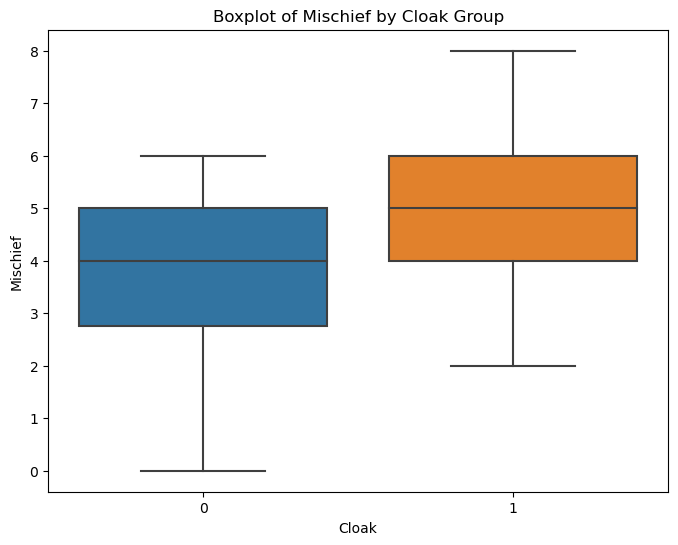

In [48]:
# Assumption 4: Checking for outliers using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cloak', y='Mischief', data=data)
plt.title('Boxplot of Mischief by Cloak Group')
plt.show()

Based on a visual review of the boxplots, there are no significant outliers in either of the two groups of the independent variable Cloak with respect to the dependent variable Mischief. This implies that the Mischief variable's distribution is rather constant among the Cloak groups, with no high values impacting the data's dissemination.

#### Assumption 5. Test for Normality by using Shapiro-Wilk Test

In [80]:
# Assumption 5: Test for normality using Shapiro-Wilk test
group0 = data[data['Cloak'] == 0]['Mischief']
group1 = data[data['Cloak'] == 1]['Mischief']

# Shapiro-Wilk Test
shapiro_group0 = shapiro(group0)
shapiro_group1 = shapiro(group1)
print("\nAssumption 5: Test for Normality (Shapiro-Wilk)")
print(f"Without Cloak (W={shapiro_group0[0]:.3f}, p={shapiro_group0[1]:.3f})")
print(f"With Cloak (W={shapiro_group1[0]:.3f}, p={shapiro_group1[1]:.3f})")


Assumption 5: Test for Normality (Shapiro-Wilk)
Without Cloak (W=0.913, p=0.231)
With Cloak (W=0.973, p=0.936)


The data is regularly distributed, which is the null hypothesis for both groups in the Shapiro-Wilk test. The data is roughly regularly distributed if the p-value is higher than 0.05, which means that the null hypothesis cannot be rejected. On the other hand, it indicates a departure from normalcy if the p-value is less than or equal to 0.05.


#### Computation

Independent Samples T-Test 

In [169]:
# Separating the groups
group_without_cloak = data[data['Cloak'] == 0]['Mischief']
group_with_cloak = data[data['Cloak'] == 1]['Mischief']

# Independent Samples T-Test
t_test = ttest_ind(group_without_cloak, group_with_cloak)

# Mean difference
mean_diff =  group_without_cloak.mean() - group_with_cloak.mean() 
# Calculate the standard error of the difference in means
se_diff_means = np.sqrt((std_without_cloak**2 / n_without_cloak) + (std_with_cloak**2 / n_with_cloak))
# Degrees of Freedom
df = len(group_without_cloak) + len(group_with_cloak) - 2

# Calculate the mean and standard deviation of each group
mean_without_cloak = group_without_cloak.mean()
mean_with_cloak = group_with_cloak.mean()
std_without_cloak = group_without_cloak.std()
std_with_cloak = group_with_cloak.std()

# Number of observations in each group
n_without_cloak = len(group_without_cloak)
n_with_cloak = len(group_with_cloak)

# Calculate the 95% confidence interval
confidence_level = 0.95
con_level = stats.t.ppf((1 + confidence_level) / 2, df)

# Margin of Error
margin_of_error = t_critical * se_diff_means

# Calculate the confidence interval for the mean difference
mean_difference = mean_without_cloak - mean_with_cloak
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print()
print("Mischief")
print(f"t-value and p-value, respectively: {t_test}")
print(f"Degrees of Freedom: {df}")
print(f"Mean Difference: {mean_diff}")
print(f"Standard error of the mean difference: {se_diff_means:.3f}")
print()
print("95% Confidence Interval of Mean Difference:")
print(f"Margin of Error: {margin_of_error:.1f}")
print(f"95% confidence interval: {con_level:.1f} ")
print(f"Lower: {ci_lower:.3f}")
print(f"Upper: {ci_upper:.3f}")


Mischief
t-value and p-value, respectively: Ttest_indResult(statistic=-1.713459383965147, pvalue=0.10068634487481125)
Degrees of Freedom: 22
Mean Difference: -1.25
Standard error of the mean difference: 0.730

95% Confidence Interval of Mean Difference:
Margin of Error: 1.5
95% confidence interval: 2.1 
Lower: -2.763
Upper: 0.263


In [109]:
# Independent Samples T-Test
t_test = ttest_ind(group0, group1)
print(f"\nIndependent Samples T-Test (t={t_test[0]:.3f}, p={t_test[1]:.3f})")
print("Conclusion:")
if t_test[1] > 0.05:
    print("The result is not statistically significant; we fail to reject the null hypothesis.")
else:
    print("The result is statistically significant; we reject the null hypothesis.")


Independent Samples T-Test (t=-1.713, p=0.101)
Conclusion:
The result is not statistically significant; we fail to reject the null hypothesis.


The result of the independent samples t-test computation is displayed. There is no reason to reject the null hypothesis based on the data because the group differences are not statistically significant at the.05 level.